随机数

In [15]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
npr.rand(10)

array([0.76658708, 0.11060062, 0.66391544, 0.62282619, 0.45878059,
       0.90658285, 0.78843044, 0.36845622, 0.04616434, 0.72381544])

In [17]:
npr.rand(5,5)

array([[0.89137068, 0.21335721, 0.0489393 , 0.152343  , 0.35997648],
       [0.49227779, 0.3674811 , 0.08770774, 0.41052466, 0.46679739],
       [0.21956447, 0.70494716, 0.0084777 , 0.03719958, 0.08890646],
       [0.05765757, 0.00253475, 0.78700272, 0.51052759, 0.797478  ],
       [0.30761194, 0.16956227, 0.75115971, 0.49823954, 0.74431469]])

In [18]:
a=5.
b=10.
npr.rand(10)*(b-a)+a

array([5.4900079 , 7.0976529 , 6.32208102, 9.65711415, 5.75439832,
       6.85017754, 8.74370108, 5.87356226, 5.25679989, 5.67068224])

In [19]:
npr.rand(5,5)*(b-a)+a

array([[9.36872567, 5.33485209, 9.34229739, 7.42356167, 5.46952027],
       [9.13465751, 5.88079611, 8.14690186, 9.62631266, 7.91976513],
       [8.69552246, 5.4247652 , 9.00570317, 8.6112644 , 7.72866891],
       [8.318589  , 5.5427901 , 7.28654862, 5.56509612, 9.80162858],
       [6.30635833, 5.10570766, 6.94605422, 6.08576213, 8.32562642]])

In [20]:
sample_size=500
rn1=npr.rand(sample_size, 3)
rn2=npr.randint(0,10,sample_size)
rn3=npr.sample(size=sample_size)
a=[0,25,50,75,100]
rn4 = npr.choice(a,size=sample_size)

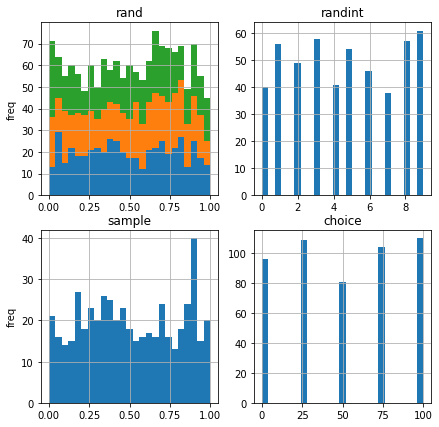

In [21]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(7,7))
ax1.hist(rn1,bins=25,stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('freq')
ax1.grid(True)
ax2.hist(rn2,bins=25)
ax2.set_title('randint')
ax2.grid(True)
ax3.hist(rn3,bins=25)
ax3.set_title('sample')
ax3.set_ylabel('freq')
ax3.grid(True)
ax4.hist(rn4,bins=25)
ax4.set_title('choice')
ax4.grid(True)

In [22]:
'''
1.(0,1)标准正态分布
2.（100，20）正态分布
3.自由度为0.5的卡方分布
4.lambda=1的poisson dist
'''
sample_size = 500
rn1=npr.standard_normal(sample_size)
rn2=npr.normal(100,20,sample_size)
rn3=npr.chisquare(df=0.5,size=sample_size)
rn4=npr.poisson(lam=1.0,size=sample_size)

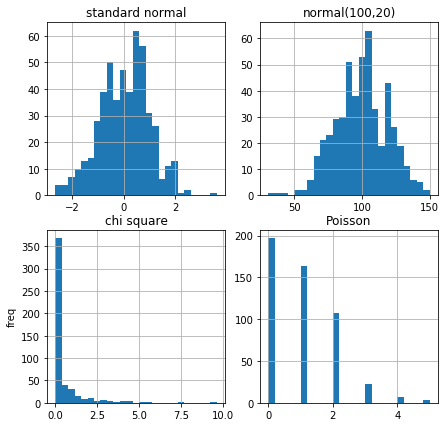

In [23]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(7,7))
ax1.hist(rn1,bins=25)
ax1.set_title('standard normal')
ax1.grid(True)
ax2.hist(rn2,bins=25)
ax2.set_title('normal(100,20)')
ax2.grid(True)
ax3.hist(rn3,bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('freq')
ax3.grid(True)
ax4.hist(rn4,bins=25)
ax4.set_title('Poisson')
ax4.grid(True)

模拟

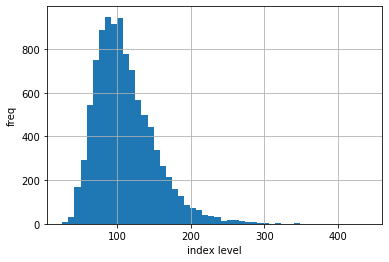

In [24]:
#随机变量BSM model
S0=100
r=0.05
sigma = 0.25
T=2.0
I=10000
ST1=S0 * np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*npr.standard_normal(I))

plt.hist(ST1,bins=50)
plt.xlabel('index level')
plt.ylabel('freq')
plt.grid(True)

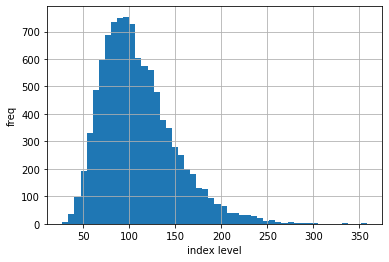

In [25]:
ST2 = S0*npr.lognormal((r-0.5*sigma**2)*T,
                      sigma*np.sqrt(T),size=I)
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('freq')
plt.grid(True)

In [26]:
import scipy.stats as scs
def print_statistics(a1,a2):
    sta1=scs.describe(a1)
    sta2=scs.describe(a2)
    print("%14s %14s %14s" % \
         ('statistic','data set 1','data set 2'))
    print(45 * "-")
    print("%14s %14.3f %14.3f" %('size', sta1[0], sta2[0]))
    print("%14s %14.3f %14.3f" %('min', sta1[1][0], sta2[1][0]))
    print("%14s %14.3f %14.3f" %('max', sta1[1][1], sta2[1][1]))
    print("%14s %14.3f %14.3f" %('mean', sta1[2], sta2[2]))
    print("%14s %14.3f %14.3f" %('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print("%14s %14.3f %14.3f" %('skew', sta1[4], sta2[4]))
    print("%14s %14.3f %14.3f" %('kurtosis', sta1[5], sta2[5]))

In [27]:
print_statistics(ST1,ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         25.492         27.155
           max        439.047        358.051
          mean        110.642        109.780
           std         40.396         40.243
          skew          1.168          1.040
      kurtosis          2.584          1.669


In [28]:
#随机过程 - 几何布朗运动
I=10000
M=50
dt=T/M
S=np.zeros((M+1,I))
S[0]=S0
for t in range(1,M+1):
    S[t] = S[t-1]*np.exp((r-0.5*sigma**2)*dt
                        +sigma*np.sqrt(dt)*npr.standard_normal(I))


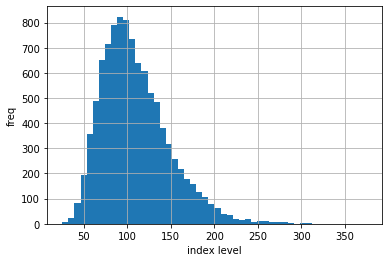

In [29]:
plt.hist(S[-1],bins=50)
plt.xlabel('index level')
plt.ylabel('freq')
plt.grid(True)

In [30]:
print_statistics(S[-1],ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         25.649         27.155
           max        374.810        358.051
          mean        109.522        109.780
           std         39.037         40.243
          skew          1.005          1.040
      kurtosis          1.648          1.669


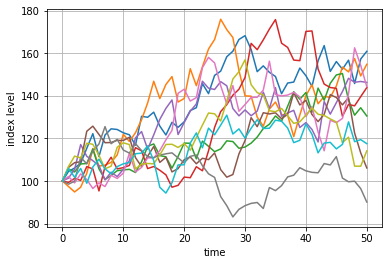

In [31]:
plt.plot(S[:,:10],lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

In [32]:
#均值回归-平方根扩散
x0=0.05
kappa=3.0
theta=0.02
sigma=0.1
I=10000
M=50
dt=T/M
def srd_euler():
    xh=np.zeros((M+1,I))
    x1=np.zeros_like(xh)
    xh[0]=x0
    x1[0]=x0
    for t in range(1,M+1):
        xh[t]=(xh[t-1]+kappa*(theta - np.maximum(xh[t-1],0))*dt
               +sigma*np.sqrt(np.maximum(xh[t-1],0))*np.sqrt(dt)
               *npr.standard_normal(I))
    x1=np.maximum(xh,0)
    return x1

x1=srd_euler()

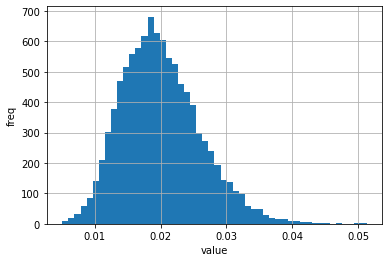

In [33]:
plt.hist(x1[-1],bins=50)
plt.xlabel('value')
plt.ylabel('freq')
plt.grid(True)

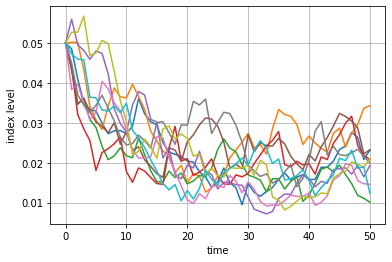

In [34]:
plt.plot(x1[:,:10],lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

In [35]:
#平方根扩散的精确离散化
def srd_exact():
    x2=np.zeros((M+1,I))
    x2[0]=x0
    for t in range(1,M+1):
        df=4*theta*kappa/sigma**2
        c=(sigma**2*(1-np.exp(-kappa*dt))) / (4*kappa)
        nc=np.exp(-kappa*dt) / c*x2[t-1]
        x2[t]=c*npr.noncentral_chisquare(df,nc,size=I)
    return x2
x2=srd_exact()

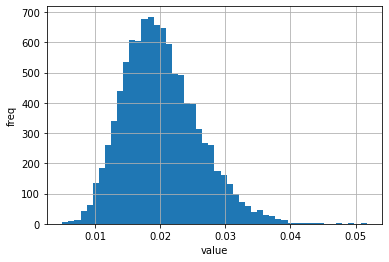

In [36]:
plt.hist(x2[-1],bins=50)
plt.xlabel('value')
plt.ylabel('freq')
plt.grid(True)

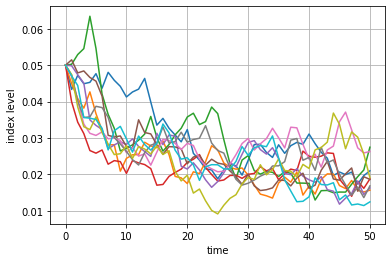

In [37]:
plt.plot(x2[:,:10],lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

In [38]:
print_statistics(x1[-1],x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.005          0.005
           max          0.051          0.052
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.559          0.561
      kurtosis          0.421          0.382


In [39]:
I=250000
%time x1=srd_euler()

Wall time: 1.87 s


In [40]:
%time x2=srd_exact()

Wall time: 2.38 s


In [41]:
print_statistics(x1[-1],x2[-1])
x1=0.0;x2=0.0

     statistic     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.002          0.004
           max          0.059          0.056
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.554          0.577
      kurtosis          0.447          0.490


In [42]:
#随机波动率-Heston
S0=100.
r=0.05
v0=0.1
kappa=3.0
theta=0.25
sigma=0.1
rho=0.6
T=1.0

corr_mat = np.zeros((2,2))
corr_mat[0,:] = [1.0,rho]
corr_mat[1,:] = [rho,1.0]
cho_mat = np.linalg.cholesky(corr_mat)
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [43]:
M=50
I=10000
ran_num = npr.standard_normal((2,M+1,I))

dt = T/M
v=np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1,M+1):
    ran =np.dot(cho_mat, ran_num[:,t,:])
    vh[t] = (vh[t-1] + kappa*(theta-np.maximum(vh[t-1],0)) * dt
            +sigma*np.sqrt(np.maximum(vh[t-1],0)) * np.sqrt(dt)
            *ran[1])
v = np.maximum(vh,0)

In [44]:
S=np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1,M+1):
    ran = np.dot(cho_mat, ran_num[:,t,:])
    S[t] = S[t-1]*np.exp((r - 0.5*v[t])*dt + 
                        np.sqrt(v[t]) * ran[0]*np.sqrt(dt))

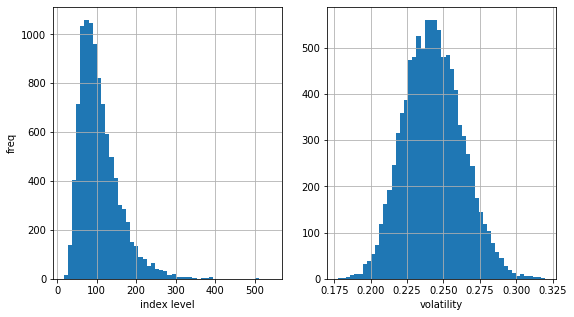

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,5))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('freq')
ax1.grid(True)
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')
ax2.grid(True)

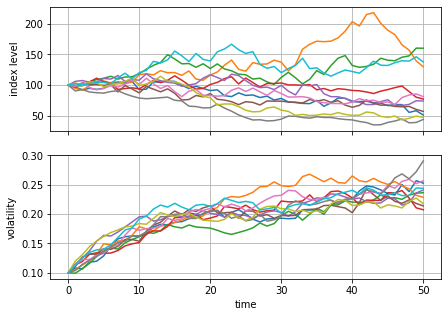

In [46]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(7,5))
ax1.plot(S[:,:10], lw=1.5)
ax1.set_ylabel('index level')
ax1.grid(True)
ax2.plot(v[:,:10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.grid(True)

In [47]:
print_statistics(S[-1],v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         16.724          0.177
           max        541.631          0.320
          mean        107.601          0.243
           std         51.263          0.020
          skew          1.542          0.190
      kurtosis          4.344         -0.063


In [48]:
#Merton跳跃扩散
S0 = 100
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
T = 1.0
M = 50
I = 10000
dt = T/M
rj = lamb * (np.exp(mu+0.5*delta**2)-1)
S = np.zeros((M+1, I))
S[0] = S0
sn1 = npr.standard_normal((M+1, I ))
sn2 = npr.standard_normal((M+1, I))
poi = npr.poisson(lamb * dt, (M+1, I))
for t in range(1,M+1, 1):
    S[t] = S[t-1] * (np.exp((r-rj-0.5*sigma**2) * dt
                           +sigma * np.sqrt(dt)*sn1[t])
                    +(np.exp(mu+ delta*sn2[t])-1)
                    *poi[t])
    S[t] = np.maximum(S[t], 0)

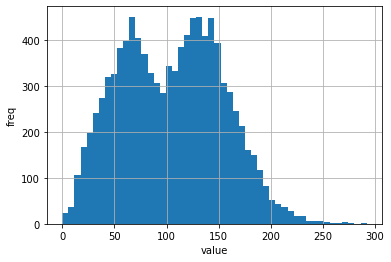

In [49]:
plt.hist(S[-1],bins=50)
plt.xlabel('value')
plt.ylabel('freq')
plt.grid(True)

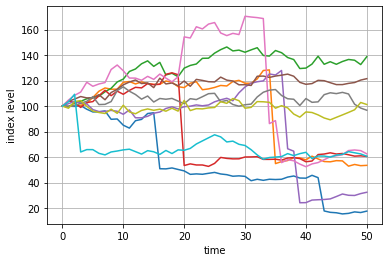

In [50]:
plt.plot(S[:,:10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

In [52]:
#方差缩减
print("%15s %15s"%('Mean','Std. Deviation'))
print(31*"-")
for i in range(1,31,2):
    npr.seed(1000)
    sn=npr.standard_normal(i**2*10000)
    print("%15.12f %15.12f" %(sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
-0.011870394558  1.008752430725
-0.002815667298  1.002729536352
-0.003847776704  1.000594044165
-0.003058113374  1.001086345326
-0.001685126538  1.001630849589
-0.001175212007  1.001347684642
-0.000803969036  1.000159081432
-0.000601970954  0.999506522127
-0.000147787693  0.999571756099
-0.000313035581  0.999646153704
-0.000178447061  0.999677277878
 0.000096501709  0.999684346792
-0.000135677013  0.999823841902
-0.000015726986  0.999906493379
-0.000039368519  1.000063091949


In [53]:
sn=npr.standard_normal(10000)
sn.mean()

0.00029698144968282703

In [54]:
sn.std()

0.9945496363968811

In [55]:
sn_new = (sn - sn.mean())/sn.std()
sn_new.mean()
sn_new.std()

0.9999999999999999

估值

In [100]:
def gen_sn(M,I,anti_paths=True, mo_match=True):
    if anti_paths is True:
        sn = npr.standard_normal((M+1,I//2))
        sn = np.concatenate((sn,-sn),axis=1)
    else:
        sn = npr.standard_normal((M+1,I))
    if mo_match is True:
        sn = (sn - sn.mean())/sn.std()
    return sn

In [101]:
#欧式期权
S0=100
r=0.05
sigma=0.25
T=1.0
I=50000
def gbm_mcs_stat(K):
    sn = gen_sn(1,I)   
    ST = S0*np.exp((r- 0.5*sigma**2)*T
                  +sigma*np.sqrt(T)*sn[1])
    hT=np.maximum(ST- K,0)
    C0=np.exp(-r*T)*1/I*np.sum(hT)
    return C0

gbm_mcs_stat(K=105.)

10.03720150556091

In [102]:
M=50
def gbm_mcs_dyna(K,option='call'):
    dt = T/M
    S=np.zeros((M+1,I))
    S[0]=S0
    sn = gen_sn(M,I)  
    for t in range(1,M+1):
        S[t] = S[t-1]*np.exp((r - 0.5*sigma**2)*dt
                            +sigma*np.sqrt(dt) *sn[t])
    if option =='call':
        hT = np.maximum(S[-1]-K,0)
    else:
        hT = np.maximum(K - S[-1],0)
    C0=np.exp(-r*T)*1/I*np.sum(hT)
    return C0

In [103]:
gbm_mcs_dyna(K=110, option = 'call')

8.05532214747536

In [104]:
gbm_mcs_dyna(K=110.,option='put')

12.631152363593147

In [64]:
from bsm_functions import bsm_call_value
stat_res = []
dyna_res = []
anal_res = []
k_list = np.arange(80.,120.1,5.)
np.random.seed(200000)
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))
    dyna_res.append(gbm_mcs_dyna(K))
    anal_res.append(bsm_call_value(S0, K,T,r,sigma))
stat_res = np.array(stat_res)
dyna_res = np.array(dyna_res)
anal_res = np.array(anal_res)

ModuleNotFoundError: No module named 'bsm_functions'

In [110]:
#美式期权
def gbm_mcs_amer(K, option = 'call'):
    dt = T/M
    df = np.exp(-r*dt)
    S=np.zeros((M+1, I))
    S[0]=S0
    sn = gen_sn(M,I)
    for t in range(1, M+1):
        S[t] = S[t-1]*np.exp((r - 0.5*sigma**2)*dt +sigma*np.sqrt(dt)*sn[t])
    if option =='call':
        h=np.maximum(S-K,0)
    else:
        h = np.maximum(K-S,0)
    V = np.copy(h)
    for t in range(M-1,0,-1):
        reg = np.polyfit(S[t],V[t+1]*df, 7)
        C=np.polyval(reg,S[t])
        V[t]=np.where(C>h[t], V[t+1]*df, h[t])
    C0 = df*1/I*np.sum(V[1])
    return C0

In [111]:
gbm_mcs_amer(110.,option = 'call')

7.7512731240528865

In [112]:
gbm_mcs_amer(110.,option = 'put')

13.647212359373555

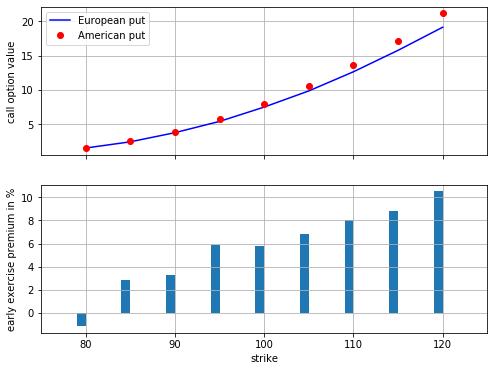

In [114]:
euro_res=[]
amer_res=[]
k_list=np.arange(80., 120.1,5.)
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K,'put'))
    amer_res.append(gbm_mcs_amer(K,'put'))
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, figsize=(8,6))
ax1.plot(k_list, euro_res, 'b',label='European put')
ax1.plot(k_list, amer_res, 'ro',label='American put')
ax1.set_ylabel('call option value')
ax1.grid(True)
ax1.legend(loc=0)
wi=1.0
ax2.bar(k_list - wi /2, (amer_res - euro_res)/euro_res*100,wi )
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75,right=125)
ax2.grid(True)    #欧式期权和LSM蒙特卡洛估算值对比

风险测度

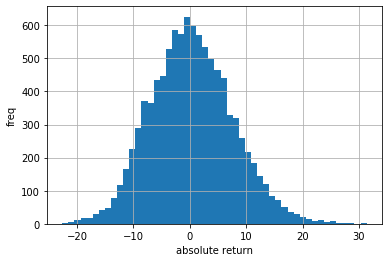

In [65]:
#风险价值
S0=100
r= 0.05
sigma=0.25
T=30/365.
I=10000
ST=S0*np.exp((r- 0.5*sigma**2)*T
            +sigma*np.sqrt(T) * npr.standard_normal(I))
R_gbm = np.sort(ST - S0)

plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('freq')
plt.grid(True)

In [66]:
percs = [0.01,0.1,1.,2.5,5.0,10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print('%16s %16s'%('Confidence Level','VaR'))
print(33*'-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100-pair[0], -pair[1]))

Confidence Level              VaR
---------------------------------
           99.99           22.268
           99.90           20.287
           99.00           15.762
           97.50           12.878
           95.00           10.900
           90.00            8.739


In [71]:
dt = 30./365/M
rj = lamb*(np.exp(mu+0.5*delta**2)-1)
S=np.zeros((M+1, I))
S[0] = S0
sn1 = npr.standard_normal((M+1, I))
sn2 = npr.standard_normal((M+1, I))
poi = npr.poisson(lamb*dt, (M+1,I))
for t in range(1, M+1,1):
    S[t] = S[t-1] * np.exp((r-rj-0.5*sigma**2)*dt
                          +sigma*np.sqrt(dt)*sn1[t])+(np.exp(mu+delta * sn2[t])-1) *poi[t]
    S[t] = np.maximum(S[t],0)
    
R_jd = np.sort(S[-1] - S0)

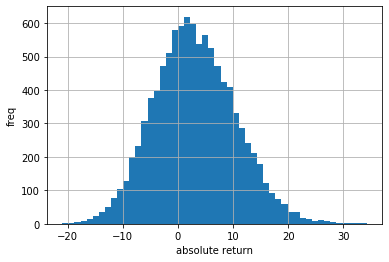

In [72]:
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('freq')
plt.grid(True)

In [73]:
percs = [0.01,0.1,1.,2.5,5.0,10.0]
var = scs.scoreatpercentile(R_jd, percs)
print("%16s %16s"%('Confidence level','VaR'))
print(33*'-')
for pair in zip(percs, var):
    print("%16.2f %16.3f" %(100-pair[0], pair[1]))

Confidence level              VaR
---------------------------------
           99.99          -19.764
           99.90          -17.619
           99.00          -12.981
           97.50          -10.690
           95.00           -8.500
           90.00           -6.168


(-23.415338884892055, 0.0)

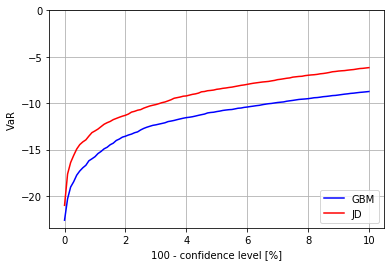

In [75]:
percs = list(np.arange(0.0,10.1,0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)
plt.plot(percs, gbm_var,'b',lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r',lw=1.5,label='JD')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('VaR')
plt.grid(True)
plt.ylim(ymax=0.0)

In [77]:
#信用价值调整
S0=100.
r=0.05
sigma = 0.2
T=1.
I=100000
ST = S0*np.exp((r - 0.5*sigma**2)*T+sigma*np.sqrt(T)*npr.standard_normal(I))

L=0.5
p=0.01
D=npr.poisson(p*T,I)
D = np.where(D>1,1,D)

In [79]:
np.exp(-r*T)*1/np.sum(ST)

9.037373382005148e-08

In [80]:
CVaR = np.exp(-r*T)*1/I*np.sum(L *D*ST)
CVaR

0.5002679643461805

In [81]:
#经过信用风险调整后
S0_CVA = np.exp(-r*T)*1/I*np.sum((1-L*D) *ST) 
S0_CVA

99.62145765093435

In [82]:
S0_adj = S0 - CVaR
S0_adj

99.49973203565382

In [83]:
np.count_nonzero(L*D*ST)

999

(0.0, 175)

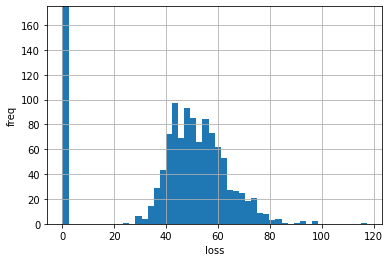

In [84]:
plt.hist(L*D*ST, bins=50)
plt.xlabel('loss')
plt.ylabel('freq')
plt.grid(True)
plt.ylim(ymax=175)

In [85]:
#European option
K=100.
hT=np.maximum(ST-K,0)
C0=np.exp(-r*T)*1/I*np.sum(hT)
C0

10.545648667097803

In [86]:
CVaR = np.exp(-r*T)*1/I*np.sum(L*D*hT)
CVaR

0.05421425762826739

In [87]:
C0_CVA = np.exp(-r*T)*1/I*np.sum((1-L*D) * hT)
C0_CVA

10.491434409469537

In [88]:
np.count_nonzero(L*D*hT)

551

In [89]:
np.count_nonzero(D)

999

In [90]:
I - np.count_nonzero(hT)

43873

(0.0, 350)

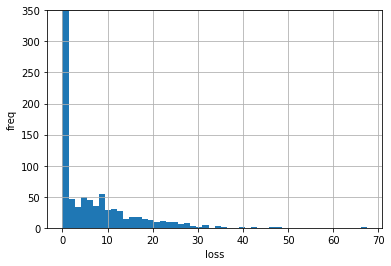

In [91]:
plt.hist(L*D*hT, bins=50)
plt.xlabel('loss')
plt.ylabel('freq')
plt.grid(True)
plt.ylim(ymax=350)